In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,discriminant_analysis,cross_validation

In [24]:
# 显示Digit数据
def show_digits():
    digits = datasets.load_digits()
    fig = plt.figure()
    #print('images 0 :',digits.data[0])
    for i in range(25):
        ax = fig.add_subplot(5,5,i+1)
        #print(digits.images[i])
        ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

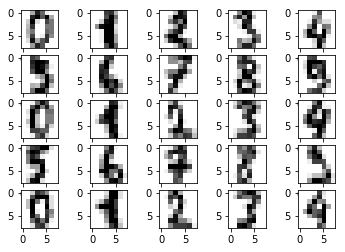

In [25]:
show_digits()

In [26]:
# 加载数据方法，这里使用scikit-learn自带的数字识别数据
def load_data():
    digits = datasets.load_digits()
    # stratify参数将按照分类比例进行拆分数据
    return cross_validation.train_test_split(digits.data, digits.target,test_size=0.25,random_state=0,stratify=digits.target)

# LDA 模型的测试

In [27]:
# LDA模型
def test_LDA(*data):
    train_x,test_x, train_y, test_y = data
    lda= discriminant_analysis.LinearDiscriminantAnalysis()
    lda.fit(train_x, train_y)

    # 成绩
    print('【成绩】Testing Score: {0}'.format(lda.score(test_x,test_y)))

In [28]:
# 测试
train_x,test_x, train_y, test_y = load_data()
test_LDA(train_x, test_x, train_y, test_y)

【成绩】Testing Score: 0.9644444444444444


/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [33]:
# lsqr中引入抖动，相当于正则化项 观察 抖动对预测结果的影响
def test_LDA_shrinkage(*data):
    train_x,test_x, train_y, test_y = data
    shrinkages=np.linspace(0.0,1.0,num=50)
    scores=[]
    for shrinkage in shrinkages:
        lda = discriminant_analysis.LinearDiscriminantAnalysis(solver='lsqr', shrinkage=shrinkage)
        lda.fit(train_x, train_y)
        scores.append(lda.score(test_x,test_y))
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(shrinkages,scores, label='Testing Score')
    ax.set_xlabel(r'shrinkage')
    ax.set_ylabel(r'score')
    ax.set_ylim(0.9,1.0)
    ax.set_title('LDA')
    plt.show()

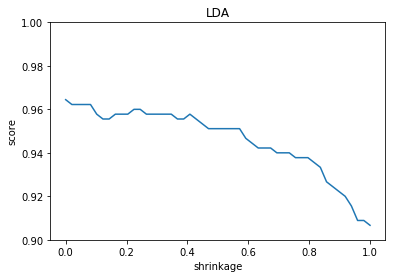

In [34]:
# 测试
train_x,test_x, train_y, test_y = load_data()
test_LDA_shrinkage(train_x, test_x, train_y, test_y)

# LR模型的测试

In [35]:
# 逻辑回归模型
def test_LR(*data):
    train_x,test_x, train_y, test_y = data
    regr = linear_model.LogisticRegression()
    regr.fit(train_x, train_y)
    # 成绩
    print('【成绩】Testing Score: {0}'.format(regr.score(test_x,test_y)))

In [37]:
# 测试
train_x,test_x, train_y, test_y = load_data()
test_LR(train_x, test_x, train_y, test_y)

【成绩】Testing Score: 0.9488888888888889


In [46]:
# 逻辑回归模型 参数C对结果的影响  C是正则化项的倒数，它越小，正则化项越大
def test_LR_C(*data):
    train_x,test_x, train_y, test_y = data
    Cs = np.logspace(-4,4,num=100)
    test_score = []
    for C in Cs:
        regr = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs',C=C)
        regr.fit(train_x,train_y)
        test_score.append(regr.score(test_x,test_y))
        
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(Cs,test_score, label='Testing Score')
    ax.set_xlabel(r'C')
    ax.set_ylabel(r'score')
    ax.set_title('LR')
    ax.set_xscale('log')
    plt.show()

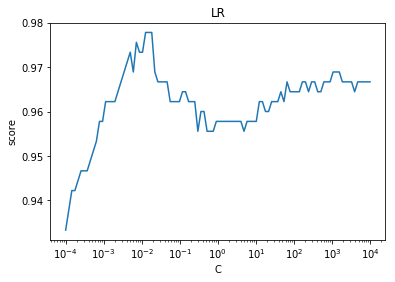

In [47]:
# 进行测试
train_x,test_x, train_y, test_y = load_data()
test_LR_C(train_x, test_x, train_y, test_y)

In [42]:
# 逻辑回归模型
def test_LR2(*data):
    train_x,test_x, train_y, test_y = data
    regr = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs',C=0.02)
    regr.fit(train_x, train_y)
    # 成绩
    print('【成绩】Testing Score: {0}'.format(regr.score(test_x,test_y)))

In [43]:
# 进行测试
train_x,test_x, train_y, test_y = load_data()
test_LR2(train_x, test_x, train_y, test_y)

【成绩】Testing Score: 0.9755555555555555
